In [9]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
from utils import cv2_imshow
%load_ext nb_black


img = cv2.imread("./images/cvbook.jpg")

(r, c) = img.shape[:2]

pts1 = np.float32([[241, 6], [726, 29], [6, 668], [627, 837]])
pts2 = np.float32([[0, 0], [300, 0], [0, 400], [300, 400]])

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

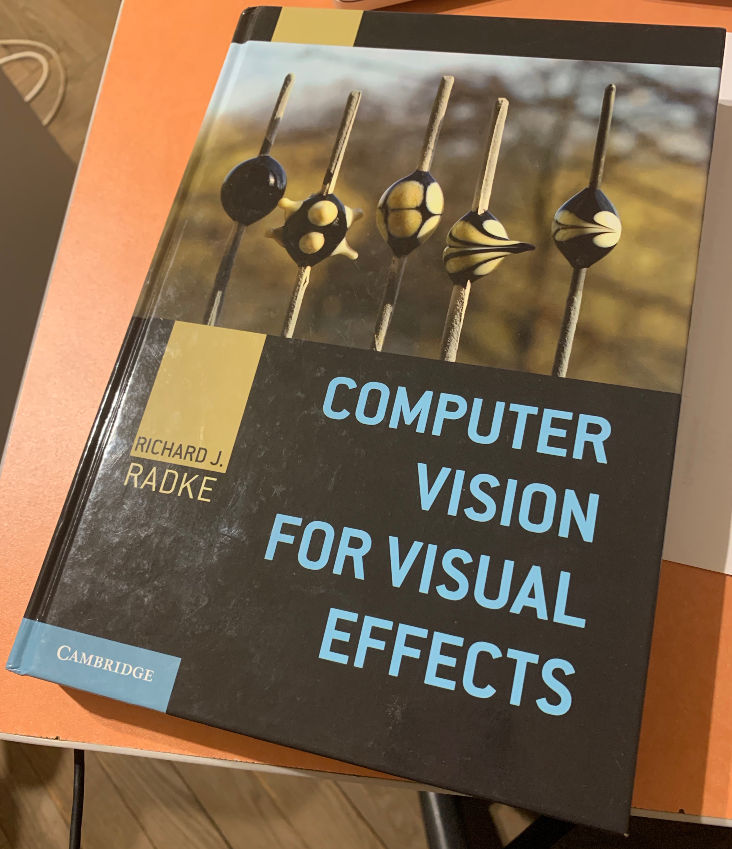

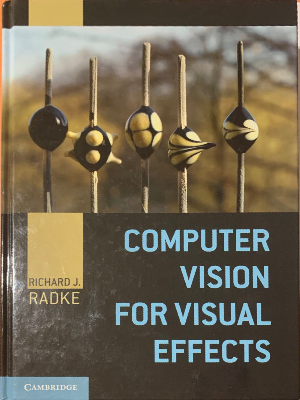

<IPython.core.display.Javascript object>

In [8]:
# implement this function
# M = cv2.getPerspectiveTransform(pts1, pts2)
def getPerspectiveTransform(p1, p2):
    A = np.array(
        [
            [pts1[0][0], pts1[0][1], 1, 0, 0, 0, 0, 0, 0, -pts2[0][0], 0, 0, 0],
            [0, 0, 0, pts1[0][0], pts1[0][1], 1, 0, 0, 0, -pts2[0][1], 0, 0, 0],
            [0, 0, 0, 0, 0, 0, pts1[0][0], pts1[0][1], 1, -1, 0, 0, 0],
            [pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, 0, 0, 0, -pts2[1][0], 0, 0],
            [0, 0, 0, pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, -pts2[1][1], 0, 0],
            [0, 0, 0, 0, 0, 0, pts1[1][0], pts1[0][1], 1, 0, -1, 0, 0],
            [pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, -pts2[2][0], 0],
            [0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, -pts2[2][1], 0],
            [0, 0, 0, 0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, -1, 0],
            [pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -pts2[3][0]],
            [0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, -pts2[3][1]],
            [0, 0, 0, 0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, -1],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        ]
    )

    y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
    x = np.dot(np.linalg.inv(A), y)
    return np.array([[x[0], x[1], x[2]], [x[3], x[4], x[5]], [x[6], x[7], x[8]]]) / x[8]

M = getPerspectiveTransform(pts1, pts2)


dst = cv2.cv2.warpPerspective(img, M, (300, 400))
cv2_imshow(img)
cv2_imshow(dst)